In [1]:
#!pip install rdflib

In [1]:
from rdflib import Graph
from rdflib import URIRef
from rdflib.namespace import RDF
from rdflib.namespace import FOAF

import sys

In [2]:
def affichage(graph):
    print("xxxxxxxxxxxxxxxxx Affichage de {graph} xxxxxxxxxxxxxx")
    for subj, pred, obj in graph:
        print("---------------------------------------------------")
        print("subj : " ,subj)
        print("pred : ", pred)
        print("obj : ",obj)
        # Check if there is at least one triple in the Graph
        if (subj, pred, obj) not in graph:
            raise Exception("It better be!")

def affichageType(graph):
    print("xxxxxxxxxxxxxxxxx Affichage de ",graph," xxxxxxxxxxxxxx")
    for subj, pred, obj in graph.triples((None,  RDF.type, None)):
        print("---------------------------------------------------")
        print(subj ," est un " ,obj)

        # Check if there is at least one triple in the Graph
        if (subj, pred, obj) not in graph:
            raise Exception("It better be!")

In [3]:
#g = Graph()

source = Graph().parse("source.ttl", format="ttl")

target = Graph().parse("target.ttl", format="ttl")

#affichage(source)
#affichageType(target)

inter = source & target
xor = target ^ source

#Print the number of "triples" in the Graph
print(f"Graph source has {len(source)} statements.")
print(f"Graph target has {len(target)} statements.")

Graph source has 10432 statements.
Graph target has 8409 statements.


# Documentation

Navigation graphe : https://rdflib.readthedocs.io/en/stable/intro_to_graphs.html

In [4]:
type(source)

rdflib.graph.Graph

In [5]:
from rdflib import URIRef
from rdflib.namespace import RDF

bob = URIRef("http://example.org/people/bob")
if (bob, RDF.type, FOAF.Person) in source:
    print("This graph knows that Bob is a person!")

In [6]:
if (bob, None, None) in source:
    print("This graph contains triples about Bob!")

In [7]:
type(bob)

rdflib.term.URIRef

In [14]:
intersection = target & source

In [10]:
affichageType(intersection)

xxxxxxxxxxxxxxxxx Affichage de  [a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].  xxxxxxxxxxxxxx
---------------------------------------------------
http://data.doremus.org/artist/a4064ce2-1e90-30f9-b01b-84f360564a61  est un  http://erlangen-crm.org/current/E21_Person
---------------------------------------------------
http://data.doremus.org/artist/942e541a-28d1-34e5-af75-4d301b0c13d6  est un  http://erlangen-crm.org/current/E21_Person
---------------------------------------------------
http://data.doremus.org/artist/1cd68120-6c81-3dbb-8225-4e04e6050193  est un  http://erlangen-crm.org/current/E21_Person
---------------------------------------------------
http://data.doremus.org/artist/99e45af8-2104-308a-b8d3-9e649cec7abb  est un  http://erlangen-crm.org/current/E21_Person
---------------------------------------------------
http://data.doremus.org/artist/8e8e52a8-926d-3cd7-a8fd-19be259bb44a  est un  http://erlangen-crm.org/current/E21_Person
------------------------

In [15]:
xor = target ^ source

In [16]:
affichage(xor)

xxxxxxxxxxxxxxxxx Affichage de {graph} xxxxxxxxxxxxxx
---------------------------------------------------
subj :  http://data.doremus.org/performance/fcbd3dce-d895-3ecd-9524-a42150c33d1b
pred :  http://erlangen-crm.org/efrbroo/R25_performed
obj :  http://data.doremus.org/expression/764ec925-a3f3-3e6f-8c9e-a7b4edf8a239
---------------------------------------------------
subj :  http://data.doremus.org/expression/a2e6b03e-74d7-3328-8806-150045b19789
pred :  http://erlangen-crm.org/current/P3_has_note
obj :  Livret attribué à Lorenzo Da Ponte
---------------------------------------------------
subj :  http://data.doremus.org/expression/f731a784-51ca-36d1-9aa8-9e3828dfac64
pred :  http://www.w3.org/1999/02/22-rdf-syntax-ns#type
obj :  http://erlangen-crm.org/efrbroo/F25_Performance_Plan
---------------------------------------------------
subj :  http://data.doremus.org/expression/28627b86-46b2-3d05-a2c6-d3347dbc8b4a
pred :  http://www.w3.org/1999/02/22-rdf-syntax-ns#type
obj :  http://erla

# Bilan 

Afficher les states des deux graphes

In [17]:
add = source + target
#uniAdd = source += target
diff = source - target
#diffSub = source -= target
inter = source & target
xor = target ^ source


#Print the number of "triples" in the Graph
print(f"      Graph source : {len(source)} statements.")
print(f"      Graph target : {len(target)} statements.")
print(f"       Graph union : {len(add)} statements.")
print(f"  Graph difference : {len(diff)} statements.")
print(f"Graph intersection : {len(inter)} statements.")
print(f"         Graph XOR : {len(xor)} statements.")

      Graph source : 10432 statements.
      Graph target : 8409 statements.
       Graph union : 18757 statements.
  Graph difference : 10348 statements.
Graph intersection : 84 statements.
         Graph XOR : 18673 statements.


# Triple Matching

Objectif : chercher un triplet dans un graphe

In [18]:
# find all subjects of any type URIRef("http://erlangen-crm.org/efrbroo/F30_Publication_Event")
for s, p, o in source.triples((None,  RDF.type, None)):
    print(f"{s} is a {p}")

http://data.doremus.org/event/5a249996-dcf6-3eff-9f0e-a91fd1503ae4 is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/bda52caa-80f4-335d-971a-e1627a7f0066 is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/db0e5fd4-dcdd-3bb3-b498-3420f431f62b is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/c6b401a9-a77f-3cfc-948b-e25d95e7a603 is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/4c450c8a-99a2-3b01-9fbc-a76582329c7e is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/f4ee731d-1508-30f2-a74d-ece5bc3876f8 is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/97cf6427-fe20-3a61-bc64-28e3fea6d5d7 is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/e2e2599a-bbe0-37cb-bc85-cd085a18febe is a http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://data.doremus.org/event/c91ab918-4

In [19]:
# find all subjects of any type
for s, p, o in source.triples((None,  RDF.type, None)):
    print(f"{s} is a {o}")

http://data.doremus.org/event/5a249996-dcf6-3eff-9f0e-a91fd1503ae4 is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/bda52caa-80f4-335d-971a-e1627a7f0066 is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/db0e5fd4-dcdd-3bb3-b498-3420f431f62b is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/c6b401a9-a77f-3cfc-948b-e25d95e7a603 is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/4c450c8a-99a2-3b01-9fbc-a76582329c7e is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/f4ee731d-1508-30f2-a74d-ece5bc3876f8 is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/97cf6427-fe20-3a61-bc64-28e3fea6d5d7 is a http://erlangen-crm.org/efrbroo/F30_Publication_Event
http://data.doremus.org/event/e2e2599a-bbe0-37cb-bc85-cd085a18febe is a http://erlangen-crm.org/efrbroo/F30_Publicatio

In [20]:
# create a graph
bobgraph = source
# add all triples with subject 'bob'
bobgraph += source.triples((bob, None, None))

# Contains check

In [21]:
from rdflib import URIRef
from rdflib.namespace import RDF

subject = URIRef("http://data.doremus.org/event/bda52caa-80f4-335d-971a-e1627a7f0066")
predicate = "" 
objects = ""

if (subject, None, None) in source:
    print("This graph knows that Bob is a person!")

This graph knows that Bob is a person!


In [8]:
subjects = {}
predicates = {}
objects = {}

subjectsOrdered = {}
predicatesOrdered = {}
objectsOrdered = {}

for s, p, o in source.triples((None,  None, None)):
    s = str(s)
    p = str(p)
    o = str(o)
    
    if s in subjects :
        subjects[s] += 1
    else :
        subjects[s] = 0 
        
    if p in predicates :
        predicates[p] += 1
    else :
        predicates[p] = 0 
        
    if o in objects :
        objects[o] += 1
    else :
        objects[o] = 0 

for i in sorted(subjects, key=subjects.get, reverse=True):
    subjectsOrdered[i] = subjects[i]
    
for i in sorted(predicates, key=predicates.get, reverse=True):
    predicatesOrdered[i] = predicates[i]

for i in sorted(objects, key=objects.get, reverse=True):
    objectsOrdered[i] = objects[i]


for w in subjectsOrdered: 
    print(subjectsOrdered[w], w)

for w in predicatesOrdered: 
    print(predicatesOrdered[w], w)

for w in objectsOrdered: 
    print(objectsOrdered[w], w)


22 http://data.doremus.org/expression/57d6469e-44c7-373b-9f0c-5e74bd77ddff
17 http://data.doremus.org/expression/cdf510dc-8613-3c86-9442-a06c2535f373
15 http://data.doremus.org/expression/449d6f66-b868-367f-89b4-d03df8543cd8
15 http://data.doremus.org/expression/66286b33-d86d-3a98-9198-9271d600547d
15 http://data.doremus.org/expression/6d79ae31-1167-397a-840a-1f2840c82baf
15 http://data.doremus.org/expression/cf7cf38d-1d8c-3b1c-b186-064e8c33ac7a
13 http://data.doremus.org/expression/f3cafc39-0024-3a32-85e9-a7a8b1d9c333
13 http://data.doremus.org/expression/c6aadaaf-4c49-34b4-b87c-421c9f0e3de2
13 http://data.doremus.org/expression/5678e812-1041-3259-a8bc-fae5e9cc5721
13 http://data.doremus.org/expression/a77e2030-f62a-329a-b1db-c7b7ff763aff
13 http://data.doremus.org/expression/4d933c4d-767f-3607-8bca-c14653191e62
13 http://data.doremus.org/expression/438b1770-bf63-3ac0-b265-5296268dd8a2
13 http://data.doremus.org/expression/f89fa32a-cd71-3509-bf72-962029d8726b
12 http://data.doremus.or

In [23]:
for w in subjectsOrdered: 
    print(subjectsOrdered[w], w)

22 http://data.doremus.org/expression/57d6469e-44c7-373b-9f0c-5e74bd77ddff
17 http://data.doremus.org/expression/cdf510dc-8613-3c86-9442-a06c2535f373
15 http://data.doremus.org/expression/66286b33-d86d-3a98-9198-9271d600547d
15 http://data.doremus.org/expression/cf7cf38d-1d8c-3b1c-b186-064e8c33ac7a
15 http://data.doremus.org/expression/449d6f66-b868-367f-89b4-d03df8543cd8
15 http://data.doremus.org/expression/6d79ae31-1167-397a-840a-1f2840c82baf
13 http://data.doremus.org/expression/c6aadaaf-4c49-34b4-b87c-421c9f0e3de2
13 http://data.doremus.org/expression/4d933c4d-767f-3607-8bca-c14653191e62
13 http://data.doremus.org/expression/5678e812-1041-3259-a8bc-fae5e9cc5721
13 http://data.doremus.org/expression/438b1770-bf63-3ac0-b265-5296268dd8a2
13 http://data.doremus.org/expression/f3cafc39-0024-3a32-85e9-a7a8b1d9c333
13 http://data.doremus.org/expression/a77e2030-f62a-329a-b1db-c7b7ff763aff
13 http://data.doremus.org/expression/f89fa32a-cd71-3509-bf72-962029d8726b
12 http://data.doremus.or

In [24]:
for w in predicatesOrdered: 
    print(predicatesOrdered[w], w)

3004 http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1283 http://erlangen-crm.org/current/P3_has_note
635 http://erlangen-crm.org/current/P102_has_title
368 http://erlangen-crm.org/current/P1_is_identified_by
314 http://data.doremus.org/ontology#U12_has_genre
259 http://erlangen-crm.org/efrbroo/R19_created_a_realisation_of
237 http://erlangen-crm.org/efrbroo/R50_assigned_to
237 http://erlangen-crm.org/efrbroo/R51_assigned
237 http://erlangen-crm.org/efrbroo/R10_has_member
237 http://erlangen-crm.org/efrbroo/R9_is_realised_in
237 http://erlangen-crm.org/efrbroo/R17_created
237 http://erlangen-crm.org/efrbroo/R44_carried_out_by
232 http://erlangen-crm.org/current/P4_has_time-span
232 http://erlangen-crm.org/efrbroo/R40_has_representative_expression
232 http://erlangen-crm.org/current/P82_at_some_time_within
231 http://erlangen-crm.org/current/P14_carried_out_by
231 http://erlangen-crm.org/current/P9_consists_of
231 http://data.doremus.org/ontology#U31_had_function_of_type
221 http://erla

In [25]:
for w in objectsOrdered: 
    print(objectsOrdered[w], w)

237 http://erlangen-crm.org/efrbroo/F42_Representative_Expression_Assignment
237 http://erlangen-crm.org/efrbroo/F15_Complex_Work
237 http://erlangen-crm.org/efrbroo/F22_Self-Contained_Expression
237 http://erlangen-crm.org/efrbroo/F28_Expression_Creation
237 http://erlangen-crm.org/efrbroo/F14_Individual_Work
237 http://data.doremus.org/Philharmonie_de_Paris
232 http://erlangen-crm.org/current/E52_Time-Span
231 http://erlangen-crm.org/current/E7_Activity
231 compositeur
219 http://erlangen-crm.org/current/E4_Period
216 http://data.doremus.org/ontology#M6_Casting
199 http://erlangen-crm.org/efrbroo/F25_Performance_Plan
199 http://erlangen-crm.org/efrbroo/F31_Performance
137 http://data.doremus.org/ontology#M5_Genre
115 http://data.doremus.org/ontology#M1_Catalogue_Statement
111 http://erlangen-crm.org/current/E21_Person
69 http://data.doremus.org/ontology#M2_Opus_Statement
51 19 ème siècle
45 musique baroque
44 18 ème siècle
43 20 ème siècle - 2 ème moitié
42 20 ème siècle - 1 ère moit

Test pour la similarité avec strsimpy

In [2]:
#!pip install strsimpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 969.7 kB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [12]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My string'))
print(normalized_levenshtein.distance('My string', 'My $stng'))
print(normalized_levenshtein.distance('My string', 'My $string'))

print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))

0.0
0.3333333333333333
0.1
0.9
0.9
0.9


In [27]:
print(normalized_levenshtein.distance('http://erlangen-crm.org/efrbroo/F28_Expression_Creation', 'http://data.doremus.org/Philharmonie_de_Paris'))

0.6727272727272727


In [15]:
subjects = {}
predicates = {}
objects = {}

SourceSubjectsOrdered = {}
SourcePredicatesOrdered = {}
SourceObjectsOrdered = {}

CibleSubjectsOrdered = {}
CiblePredicatesOrdered = {}
CibleObjectsOrdered = {}

for s, p, o in source.triples((None,  None, None)):
    s = str(s)
    p = str(p)
    o = str(o)
    
    if s in subjects :
        subjects[s] += 1
    else :
        subjects[s] = 0 
        
    if p in predicates :
        predicates[p] += 1
    else :
        predicates[p] = 0 
        
    if o in objects :
        objects[o] += 1
    else :
        objects[o] = 0 

for i in sorted(subjects, key=subjects.get, reverse=True):
    SourceSubjectsOrdered[i] = subjects[i]
    
for i in sorted(predicates, key=predicates.get, reverse=True):
    SourcePredicatesOrdered[i] = predicates[i]

for i in sorted(objects, key=objects.get, reverse=True):
    SourceObjectsOrdered[i] = objects[i]

subjects = {}
predicates = {}
objects = {}

for s, p, o in target.triples((None,  None, None)):
    s = str(s)
    p = str(p)
    o = str(o)
    
    if s in subjects :
        subjects[s] += 1
    else :
        subjects[s] = 0 
        
    if p in predicates :
        predicates[p] += 1
    else :
        predicates[p] = 0 
        
    if o in objects :
        objects[o] += 1
    else :
        objects[o] = 0 

for i in sorted(subjects, key=subjects.get, reverse=True):
    CibleSubjectsOrdered[i] = subjects[i]
    
for i in sorted(predicates, key=predicates.get, reverse=True):
    CiblePredicatesOrdered[i] = predicates[i]

for i in sorted(objects, key=objects.get, reverse=True):
    CibleObjectsOrdered[i] = objects[i]

print(len(SourceObjectsOrdered))
print(len(CibleObjectsOrdered))


4442
3473


In [43]:
import numpy as np 

uri = "http://data.doremus.org/expression/57d6469e-44c7-373b-9f0c-5e74bd77ddff"
#seuil = 0.1
sameAs = 0
file = open("subjects.csv", "a")
file.write("x;y\n")

for i in np.linspace(0,1,1000,endpoint=False):
    for t in CibleSubjectsOrdered: 
        if normalized_levenshtein.distance(str(uri), str(t)) < i: 
            sameAs += 1

    file.write(str(i) + ";" + str(sameAs) + "\n")
    print(str(i), sameAs)
    sameAs=0

file.close()



0.0 0
0.001 0
0.002 0
0.003 0
0.004 0
0.005 0
0.006 0
0.007 0
0.008 0
0.009000000000000001 0
0.01 0
0.011 0
0.012 0
0.013000000000000001 0
0.014 0
0.015 0
0.016 0
0.017 0
0.018000000000000002 0
0.019 0
0.02 0
0.021 0
0.022 0
0.023 0
0.024 0
0.025 0
0.026000000000000002 0
0.027 0
0.028 0
0.029 0
0.03 0
0.031 0
0.032 0
0.033 0
0.034 0
0.035 0
0.036000000000000004 0
0.037 0
0.038 0
0.039 0
0.04 0
0.041 0
0.042 0
0.043000000000000003 0
0.044 0
0.045 0
0.046 0
0.047 0
0.048 0
0.049 0
0.05 0
0.051000000000000004 0
0.052000000000000005 0
0.053 0
0.054 0
0.055 0
0.056 0
0.057 0
0.058 0
0.059000000000000004 0
0.06 0
0.061 0
0.062 0
0.063 0
0.064 0
0.065 0
0.066 0
0.067 0
0.068 0
0.069 0
0.07 0
0.07100000000000001 0
0.07200000000000001 0
0.073 0
0.074 0
0.075 0
0.076 0
0.077 0
0.078 0
0.079 0
0.08 0
0.081 0
0.082 0
0.083 0
0.084 0
0.085 0
0.08600000000000001 0
0.08700000000000001 0
0.088 0
0.089 0
0.09 0
0.091 0
0.092 0
0.093 0
0.094 0
0.095 0
0.096 0
0.097 0
0.098 0
0.099 0
0.1 0
0.101 0
0.1020

In [44]:
import pandas as pd

df = pd.read_csv("subjects.csv", sep=";")

df

x     y
0    0.000     0
1    0.001     0
2    0.002     0
3    0.003     0
4    0.004     0
..     ...   ...
995  0.995  2597
996  0.996  2597
997  0.997  2597
998  0.998  2597
999  0.999  2597

[1000 rows x 2 columns]

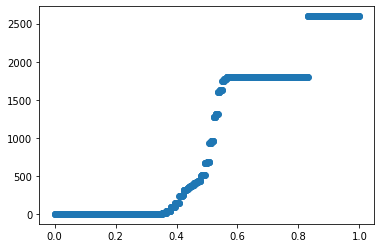

In [45]:
import numpy as np
import matplotlib.pyplot as plt

x = df.x
y = df.y

plt.scatter(x, y)
plt.show()

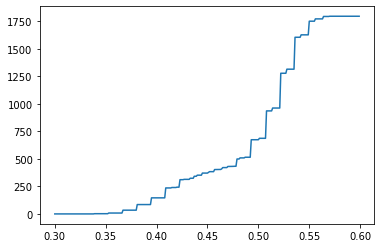

In [49]:
fig = plt.figure()
ax = plt.axes()

x = df.iloc[300:600].x
y = df.iloc[300:600].y
ax.plot(x, y);

In [48]:
df.iloc[300:600]

x  y
30  0.030  0
31  0.031  0
32  0.032  0
33  0.033  0
34  0.034  0
35  0.035  0
36  0.036  0
37  0.037  0
38  0.038  0
39  0.039  0
40  0.040  0
41  0.041  0
42  0.042  0
43  0.043  0
44  0.044  0
45  0.045  0
46  0.046  0
47  0.047  0
48  0.048  0
49  0.049  0
50  0.050  0
51  0.051  0
52  0.052  0
53  0.053  0
54  0.054  0
55  0.055  0
56  0.056  0
57  0.057  0
58  0.058  0
59  0.059  0
60  0.060  0
61  0.061  0
62  0.062  0
63  0.063  0
64  0.064  0
65  0.065  0
66  0.066  0
67  0.067  0
68  0.068  0
69  0.069  0
70  0.070  0
71  0.071  0
72  0.072  0
73  0.073  0
74  0.074  0
75  0.075  0
76  0.076  0
77  0.077  0
78  0.078  0
79  0.079  0
80  0.080  0
81  0.081  0
82  0.082  0
83  0.083  0
84  0.084  0
85  0.085  0
86  0.086  0
87  0.087  0
88  0.088  0
89  0.089  0

In [ ]:
# Trop long 15 000 000 de print

fileSubjects = open("subjects.csv", "a")
filePredicates = open("predicates.txt", "a")
fileObjects = open("objects.txt", "a")

for s in SourceSubjectsOrdered: 
    for t in CibleSubjectsOrdered: 
        fileSubjects.write(normalized_levenshtein.distance(str(s), str(t)))

for s in SourcePredicatesOrdered: 
    for t in CiblePredicatesOrdered: 
        filePredicates.write(normalized_levenshtein.distance(str(s), str(t)))

for s in SourceObjectsOrdered: 
    for t in CibleObjectsOrdered: 
        fileObjects.write(normalized_levenshtein.distance(str(s), str(t)))

fileSubjects.close()
filePredicates.close()
fileObjects.close()

Tous les types de relations.
Relations en commun entre les 2 graphes.

In [27]:
def getRelationTypes(g):
    result_set = []

    # find all subjects of any type
    for s, p, o in g.triples((None, RDF.type, None)):
        #(f"{s} is a {o}")
        result_set.append(o)

    result_set = list(dict.fromkeys(result_set))

    return result_set

In [28]:
for l in getRelationTypes(source):
  for g in getRelationTypes(target):
    if l == g:
      print('source : ',l,' --> target : ', g)

source :  http://erlangen-crm.org/efrbroo/F30_Publication_Event  --> target :  http://erlangen-crm.org/efrbroo/F30_Publication_Event
source :  http://data.doremus.org/ontology#M6_Casting  --> target :  http://data.doremus.org/ontology#M6_Casting
source :  http://erlangen-crm.org/efrbroo/F28_Expression_Creation  --> target :  http://erlangen-crm.org/efrbroo/F28_Expression_Creation
source :  http://erlangen-crm.org/current/E52_Time-Span  --> target :  http://erlangen-crm.org/current/E52_Time-Span
source :  http://erlangen-crm.org/current/E7_Activity  --> target :  http://erlangen-crm.org/current/E7_Activity
source :  http://erlangen-crm.org/efrbroo/F25_Performance_Plan  --> target :  http://erlangen-crm.org/efrbroo/F25_Performance_Plan
source :  http://erlangen-crm.org/efrbroo/F14_Individual_Work  --> target :  http://erlangen-crm.org/efrbroo/F14_Individual_Work
source :  http://erlangen-crm.org/efrbroo/F31_Performance  --> target :  http://erlangen-crm.org/efrbroo/F31_Performance
source

Tous les préfixes sont notés dans les fichiers sources.ttl et target.ttl

In [30]:
def getAllGenres(graph):
    #Retourne tous les genres de tous les F22_Self-Contained_Expression du graph
    req = """
    PREFIX mus: <http://data.doremus.org/ontology#>
    PREFIX ecrm:  <http://erlangen-crm.org/current/>
    PREFIX efrbroo: <http://erlangen-crm.org/efrbroo/>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
    SELECT DISTINCT ?genre ?z
    WHERE {
        ?x a efrbroo:F22_Self-Contained_Expression ;
        mus:U12_has_genre ?genre .
        OPTIONAL {
            SELECT ?genre ?z
            WHERE {
                ?genre a mus:M5_Genre ;
                ecrm:P1_is_identified_by ?z;
            }
        }
    }
    """

    #mus:U12_has_genre [ a mus:M5_Genre ;
    #                      ecrm:P1_is_identified_by  "musique contemporaine"@fr
    #                  ] ;

    result = graph.query(req)

    print("Nombre genres : " + str(len(result)))
    for row in result:
        print(row.genre)
        if(row.z):
            print(str(row.z) + " (" + row.z.language + ")")
    return result







In [31]:
def getAllNotes(graph):
    print("Notes : ")
    req = """
    PREFIX mus: <http://data.doremus.org/ontology#>
    PREFIX ecrm:  <http://erlangen-crm.org/current/>
    PREFIX efrbroo: <http://erlangen-crm.org/efrbroo/>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
    SELECT DISTINCT ?note
    WHERE {
        ?x a efrbroo:F22_Self-Contained_Expression ;
        ecrm:P3_has_note ?note .
    }
    """

    result = graph.query(req)

    for row in result:
        print(str(row.note))
        print(row.note.n3())
    return result

In [24]:
def getCasting(graph):
    print("Casting : ")
    req = """
        PREFIX mus: <http://data.doremus.org/ontology#>
        PREFIX ecrm:  <http://erlangen-crm.org/current/>
        PREFIX efrbroo: <http://erlangen-crm.org/efrbroo/>
        PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
        SELECT DISTINCT ?property
        WHERE {
            ?x a efrbroo:F22_Self-Contained_Expression ;
            mus:U13_has_casting ?casting .
            {
                SELECT ?casting ?property ?title
                WHERE {
                       ?casting a mus:M6_Casting ;
                       ?property ?title . 
                }
            }
        }
        """

    result = graph.query(req)

    for row in result:
        print(str(row.property))
    return result

In [25]:
def getRefersTo(graph):
    print("Refers to : ")
    req = """
    PREFIX mus: <http://data.doremus.org/ontology#>
    PREFIX ecrm:  <http://erlangen-crm.org/current/>
    PREFIX efrbroo: <http://erlangen-crm.org/efrbroo/>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
    SELECT DISTINCT ?refers
    WHERE {
        ?x a efrbroo:F22_Self-Contained_Expression ;
        ecrm:P67_refers_to ?refers .
    }
    """

    result = graph.query(req)

    for row in result:
        print(row)
    return result

In [27]:
print (getAllGenres(source))

Nombre genres : 174
http://data.doremus.org/vocabulary/diabolo/genre/lied
http://data.doremus.org/vocabulary/iaml/genre/op
nb274b4b1b4c14161ae5d72574bee132ab17
opera seria (fr)
nb274b4b1b4c14161ae5d72574bee132ab18
musique baroque (fr)
http://data.doremus.org/vocabulary/iaml/genre/rp
http://data.doremus.org/vocabulary/iaml/genre/co
nb274b4b1b4c14161ae5d72574bee132ab33
musique contemporaine (fr)
http://data.doremus.org/vocabulary/diabolo/genre/madrigal
nb274b4b1b4c14161ae5d72574bee132ab34
musique baroque (fr)
nb274b4b1b4c14161ae5d72574bee132ab37
musique contemporaine (fr)
http://data.doremus.org/vocabulary/diabolo/genre/messe
nb274b4b1b4c14161ae5d72574bee132ab47
musique classique (fr)
nb274b4b1b4c14161ae5d72574bee132ab48
musique sacrée (fr)
nb274b4b1b4c14161ae5d72574bee132ab54
musique contemporaine (fr)
http://data.doremus.org/vocabulary/diabolo/genre/musique_de_chambre
nb274b4b1b4c14161ae5d72574bee132ab63
musique baroque (fr)
http://data.doremus.org/vocabulary/iaml/genre/sy
nb274b4b1b4c